# Static problem

A rewrite of Serge's problem

* shifted code to [PEP8](https://peps.python.org/pep-0008/)
* movde code into functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Define demand as a function of price.

In [2]:
def demand(price, B, q_ref, p_ref):
    a = np.log(q_ref / (1.0 - q_ref)) + B * np.log(price)
    return 1 / (1.0 + np.exp(-a))

Define profits as a function of price (fee)

In [3]:
def profit(fee,
           baseline_active=0.36,     # baseline activity
           b1=0,                     # no intensive margin
           b2=0,                     # no intensive margin
           b3=0,                     # no intensive margin
           b4=0,                     # no intensive margin
           baseline_tpv=4500,        # Baseline TPV
           aov=100,                  # AOV
           cop=0.0058,               # COP per dollar
           baseline_reg=250,         # baseline registratins
           dsim=0,                   # Assuming away DSI for now
           baselaunch_rate = 0.15):
    
    active = demand(fee, b1, baseline_active, baseline_fee)

    # Calculate merchant value
    tpv = baseline_tpv  * (fee/baseline_fee)**b2
    order_count = tpv / aov   
    direct_cp = (fee - cop) * tpv + (0.30 * order_count)
    mv = direct_cp + dsim    
    
    # Calculate new launch
    new_reg = baseline_reg * (fee / baseline_fee)**b3
    launch_rate = demand(fee, b4, baselaunch_rate, baseline_fee)
    new_launch = new_reg * launch_rate
        
    profit = (new_launch * (36 * active * mv)) / 1000
    return profit

Numerical experiments.

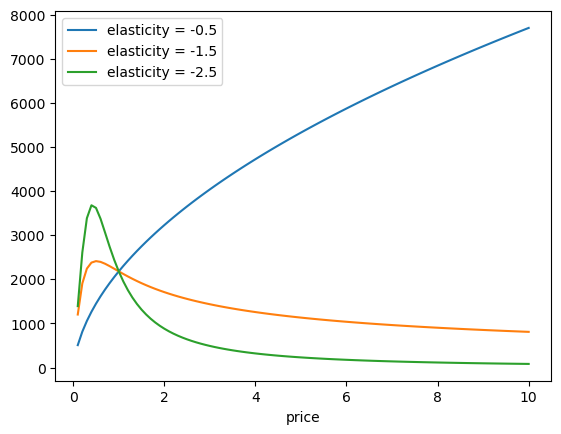

In [4]:
elasticities = [-0.5, -1.5, -2.5]
fee = np.linspace(0.1, 10.0, 100)
baseline_fee = 0.027

fig, ax = plt.subplots()

for elasticity in elasticities:
    
    prof = profit(fee, b4=elasticity)
    ax.plot(fee, prof, label=f"elasticity = {elasticity}")

ax.set_xlabel("price")
ax.set_ylabel("")
ax.legend()
plt.show()
#